# Lição 1
## Autor: Antonio Rangel Chaves
## Matrícula: 180098021
## Objetivo
O objetivo deste artigo é utilizar na prática a biblioteca fastai para distinguir dinossauros que sejam terópodes dos que sejam saurópodes. Em um dos testes será dado como entrada o desenho de um dinossauro que se assemelha bastante tanto a um terópode quanto à um saurópode, e a rede neural terá que decidir a qual clado este dinossauro pertence.

## Contextualização
No objetivo deste artigo foram citados os nomes de dois clados: Terópodes e Saurópodes, e talvez o leitor desconheça esses nomes. Para ficar mais claro, os terópodes eram dinossauros que andavam sobre duas patas e eram carnívoros ou omnívoros, o mais famoso deles sendo o Tiranossauro Rex. Já os saurópodes são os dinossauros "Pescoçudos" que geralmente aparecem em mídias de entretenimento.

<img src="https://www.blogs.unicamp.br/colecionadores/wp-content/uploads/sites/243/2017/05/dinosaur-cladogram-conventional-2-600-px-tiny-Mar-2017-Darren-Naish-Tetrapod-Zoology.jpg" alt="drawing" width="400"/>

## Passo 1 - Instalação de dependências
Neste primeiro passo iremos instalar o fastai, o fastbook e o DuckDuckGo que é um buscador.


In [ ]:
!pip install -U duckduckgo_search

In [ ]:
!pip install -Uqq fastai duckduckgo_search fastbook
!pip install -U duckduckgo_search

import os
from fastai.vision.all import *
from fastbook import *

## Passo 2 - Download de imagens de Terópodes e Saurópodes

In [ ]:
#Para maximizar os resultados, será feita uma busca com os termos em inglês
buscas = 'sauropod', 'theropod'
caminho = Path('dinos')

for aux in buscas:
    dest = (caminho/aux)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images_ddg(aux, max_images=100))
    resize_images(caminho/aux, max_size=400, dest=caminho/aux)

Algumas fotos podem estar corrompidas, portanto temos que verifica-las e caso alguma esteja de fato corrompida, iremos removê-la

In [12]:
falhas = verify_images(get_image_files(caminho))
falhas.map(Path.unlink)
print(f'Quantidade de imagens corrompidas: {len(falhas)}')

Quantidade de imagens corrompidas: 0


## Passo 3 - Treinar o modelo

No treinamento do modelo, é usado um `Dataloader` que é um objeto que possui o objetivo de treinar o modelo, e no caso deste artigo o objeto contém imagens. O `fastai` possui um `DataLoader`, que é o `DataBlock` mostrado abaixo. Após carregar o `DataBlock`, o método `show_batch` é chamado para que algumas imagens do `DataBlock` sejam mostradas. E nesse caso todas as imagens estão com seus rótulos corretos.

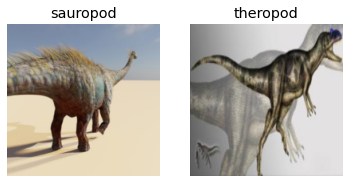

In [31]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(caminho, bs=32)

dls.show_batch(max_n=2)

Agora o método de aprender é utilizado e o DataBlock é passado como parâmetro, desta forma a rede neural consegue distuinguir um Saurópode de um Terópode.

In [ ]:
aprender = vision_learner(dls, resnet18, metrics=error_rate)
aprender.fine_tune(6)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.586922,1.022374,0.457143,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.622294,0.845038,0.400000,00:17
1,0.470856,0.668803,0.257143,00:17
2,0.332672,0.565121,0.200000,00:17
3,0.244763,0.586242,0.200000,00:16
4,0.200182,0.588136,0.200000,00:17
5,0.172664,0.584810,0.200000,00:17


## Passo 4 - Testar o modelo
Nesta etapa é dada uma imagem como entrada, e o modelo irá fazer uma predição se ela corresponde à um Saurópode ou Terópode. A espécie escolhida para os testes é o Therizinossaurus, pois ele possuia o pescoço longo parecido com um Saurópode, porém ele era um Terópode que andava sobre duas patas. Dessa forma podemos verificar o quão preciso é o modelo.

### Teste 1

Predição: sauropod.
Probabilidades: Saurópode: 0.9667 and Terópode: 0.0333


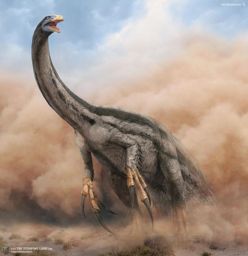

In [ ]:
from fastdownload import download_url

imageURL = 'https://i.pinimg.com/originals/4a/4b/de/4a4bde32373ccd53987fdc09441f8d23.jpg'
nomeIMG = '4a4bde32373ccd53987fdc09441f8d23.jpg'
download_url(imageURL, '', show_progress=False)
resultado,_,probs = aprender.predict(PILImage.create(nomeIMG))

print(f"Predição: {resultado}.")
print(f"Probabilidades: Saurópode: {probs[0]:.4f} and Terópode: {probs[1]:.4f}")

Image.open(nomeIMG).to_thumb(256,256)

### Teste 2

Predição: theropod.
Probabilidades: Saurópode: 0.0071 and Terópode: 0.9929


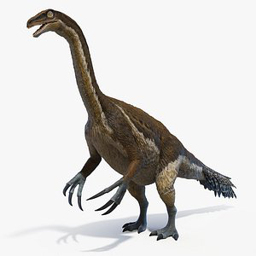

In [ ]:
from fastdownload import download_url

imageURL = 'https://p.turbosquid.com/ts-thumb/Z9/1z2F7B/vB/therizinosaurus_sig/jpg/1615149577/300x300/sharp_fit_q85/2d28d0b7db5ea9979a3a3878cafbc45f365fec1b/therizinosaurus_sig.jpg'
nomeIMG = 'therizinosaurus_sig.jpg'
download_url(imageURL, '', show_progress=False)
resultado,_,probs = aprender.predict(PILImage.create(nomeIMG))

print(f"Predição: {resultado}.")
print(f"Probabilidades: Saurópode: {probs[0]:.4f} and Terópode: {probs[1]:.4f}")

Image.open(nomeIMG).to_thumb(256,256)

### Teste 3

Predição: sauropod.
Probabilidades: Saurópode: 0.5306 and Terópode: 0.4694


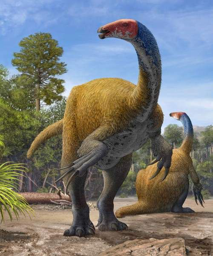

In [ ]:
from fastdownload import download_url

imageURL = 'https://i.pinimg.com/564x/a6/52/9f/a6529fa670664da58d3bb42f1db13509.jpg'
nomeIMG = 'a6529fa670664da58d3bb42f1db13509.jpg'
download_url(imageURL, '', show_progress=False)
resultado,_,probs = aprender.predict(PILImage.create(nomeIMG))

print(f"Predição: {resultado}.")
print(f"Probabilidades: Saurópode: {probs[0]:.4f} and Terópode: {probs[1]:.4f}")

Image.open(nomeIMG).to_thumb(256,256)

# Conclusão
Com esses três testes, é possível concluir que existe a possibilidade do modelo errar ao analisar ilustrações do Therizinosaurus, pois suas características físicas se assemelham tanto à um Saurópode quanto à um Terópode.